In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

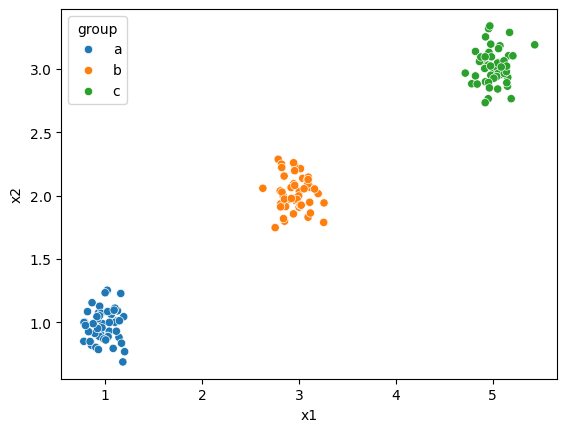

In [3]:
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group')


<Axes: xlabel='x1', ylabel='x2'>

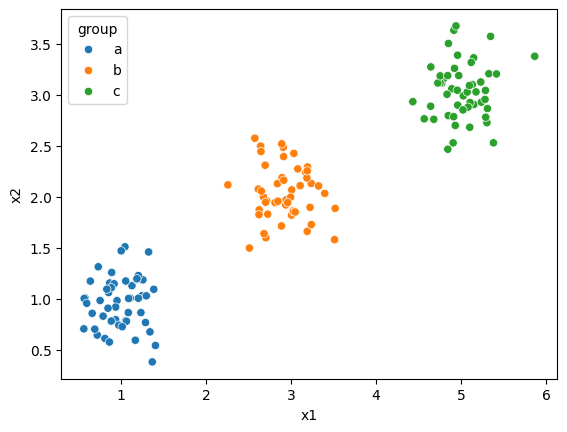

In [4]:
sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

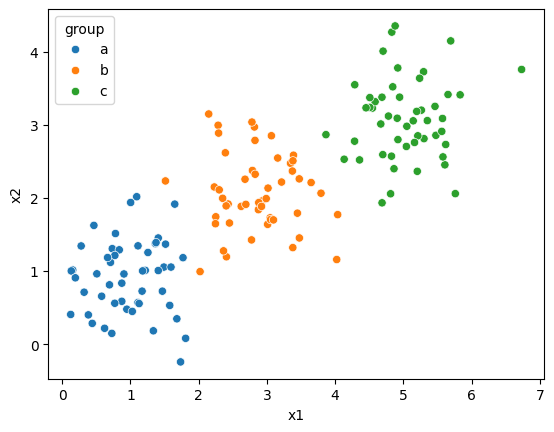

In [5]:
sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

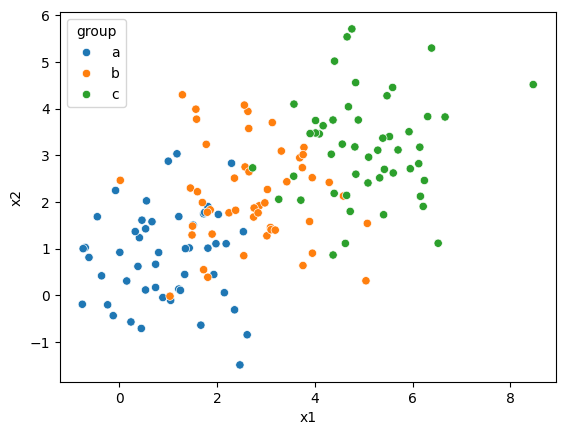

In [6]:
sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group')

<Axes: xlabel='x1', ylabel='x2'>

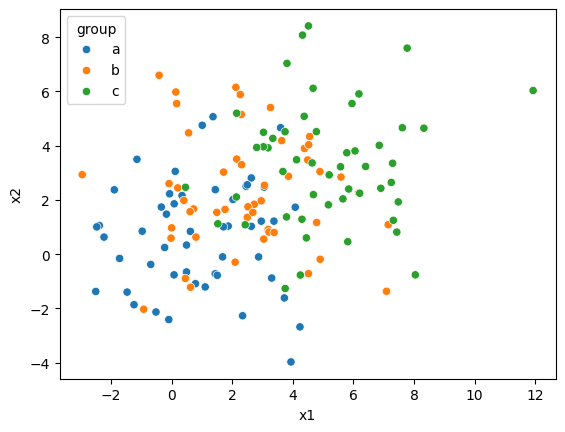

In [7]:
sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group')

As noise increases the distinctiveness of each cluster decrease, if the plots were not colored it eventually becomes near impossible to distinguish between the different clusters.

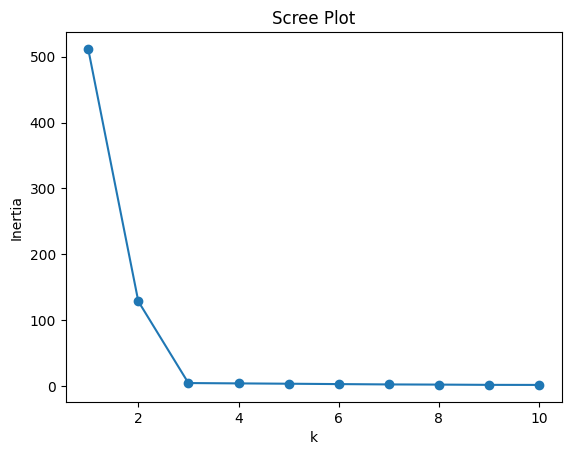

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_scree(data, max_k=10):
    inertia_values = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto')
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), inertia_values, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()

X = df0_125[['x1', 'x2']].values
plot_scree(X)

K is clearly 2

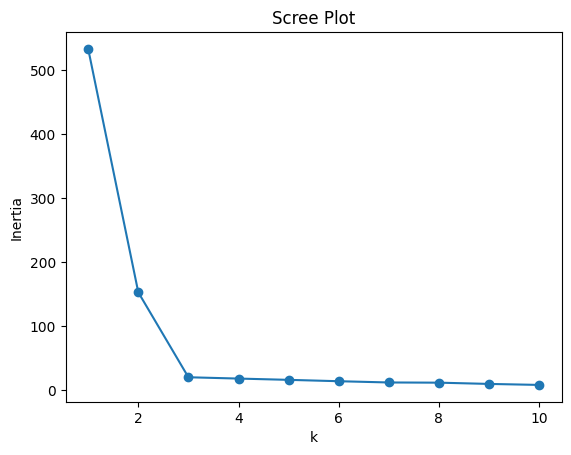

In [9]:
X = df0_25[['x1', 'x2']].values
plot_scree(X)

not as good but still clearly 2

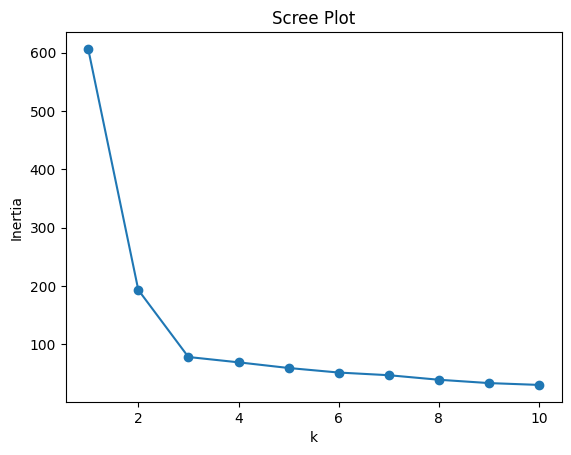

In [10]:
X = df0_5[['x1', 'x2']].values
plot_scree(X)

little messier but still 2

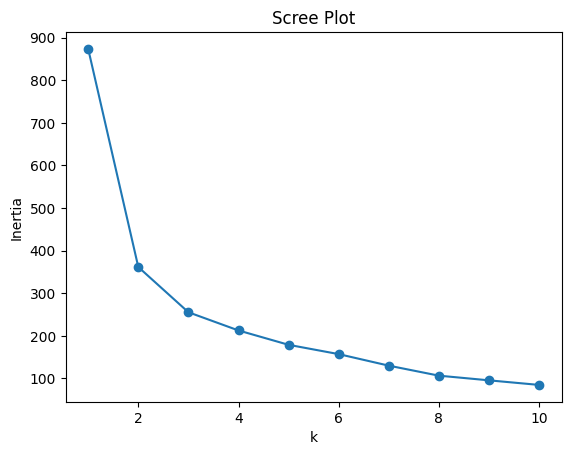

In [11]:
X = df1_0[['x1', 'x2']].values
plot_scree(X)

I would still probably choose 2 but it isn't cut and dry

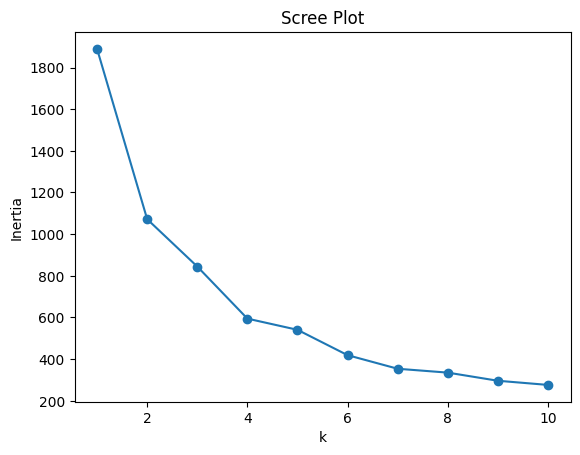

In [12]:
X = df2_0[['x1', 'x2']].values
plot_scree(X)

At this point a clear K is near impossible to distinguish, the scale of the y axis has drastically increased as well.

**Question 5**

In [13]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

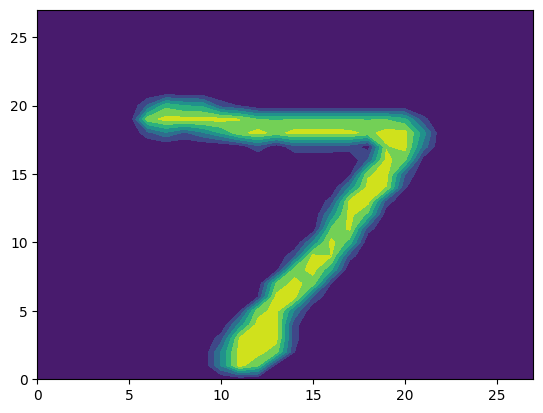

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

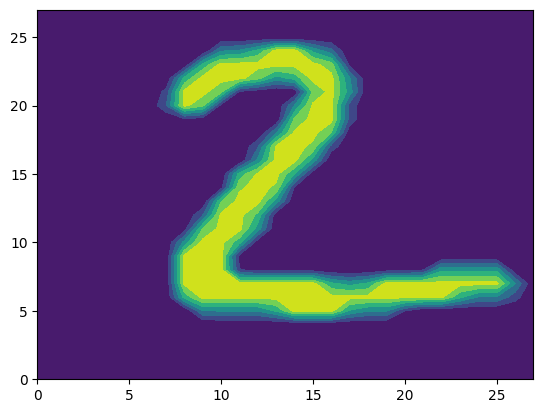

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

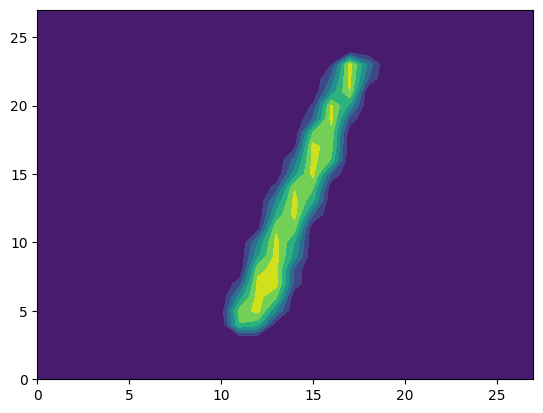

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

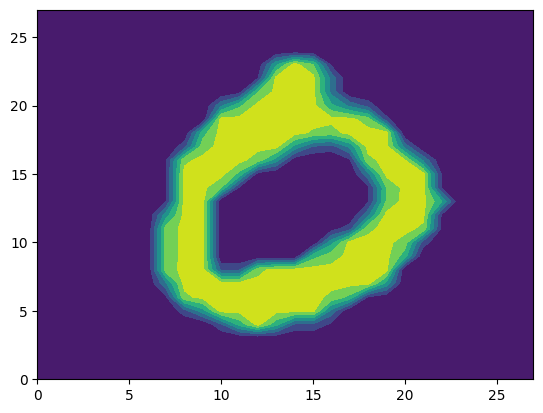

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

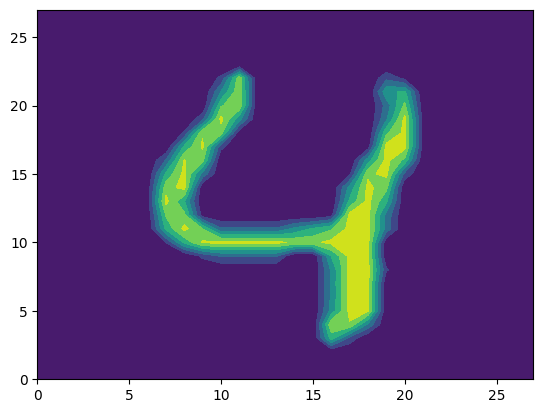

In [14]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()


In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
X_train[i].shape

(28, 28)

In [18]:
X_test[i].shape

(28, 28)

In [19]:
y_train.shape

(60000,)

In [20]:
y_test.shape

(10000,)

In [31]:
reload = 0

Z_train = []
for i in range(100):
    row = X_train[i].reshape((1,784))
    Z_train.append(row[0])
Z_train = pd.DataFrame(Z_train)

Z_test = []
for i in range(len(y_test)):
    row = X_test[i].reshape((1,784))
    Z_test.append(row[0])
Z_test = pd.DataFrame(Z_test)

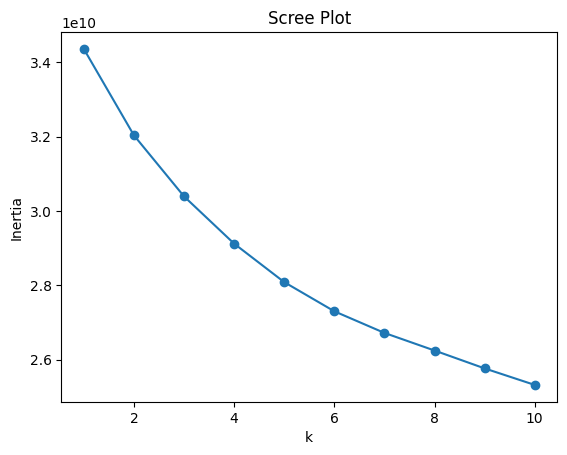

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_scree(Z_test, max_k=10):
    inertia_values = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto')
        kmeans.fit(Z_test)
        inertia_values.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), inertia_values, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()

X = Z_test.values
plot_scree(X)

It appears to pick 10, it's difficult to distinguish a clear elbow so I'm assuming 10 is the selection.

In [35]:
results = []
for i in range(Z_test.shape[1]):
    result = pd.crosstab(Z_test.iloc[:, i], Z_train.iloc[:, i])
    results.append(result)


[0    0
 0     
 0  100,
 1    0
 1     
 0  100,
 2    0
 2     
 0  100,
 3    0
 3     
 0  100,
 4    0
 4     
 0  100,
 5    0
 5     
 0  100,
 6    0
 6     
 0  100,
 7    0
 7     
 0  100,
 8    0
 8     
 0  100,
 9    0
 9     
 0  100,
 10    0
 10     
 0   100,
 11    0
 11     
 0   100,
 12    0
 12     
 0   100,
 13    0
 13     
 0   100,
 14    0
 14     
 0   100,
 15    0
 15     
 0   100,
 16    0
 16     
 0   100,
 17    0
 17     
 0   100,
 18    0
 18     
 0   100,
 19    0
 19     
 0   100,
 20    0
 20     
 0   100,
 21    0
 21     
 0   100,
 22    0
 22     
 0   100,
 23    0
 23     
 0   100,
 24    0
 24     
 0   100,
 25    0
 25     
 0   100,
 26    0
 26     
 0   100,
 27    0
 27     
 0   100,
 28    0
 28     
 0   100,
 29    0
 29     
 0   100,
 30    0
 30     
 0   100,
 31    0
 31     
 0   100,
 32    0
 32     
 0   100,
 33    0
 33     
 0   100,
 34    0
 34     
 0   100,
 35    0
 35     
 0   100,
 36    0
 36     
 0  

I'm assuming I did something horribly horribly wrong because now I am awash in data and I have no idea what any of this means. I have a strict rule for myself to not use chatgpt so I'm lost in the land of confusion. I don't see a clear confusion table but I see 1s and 0s pretty consistently so I'm assuming this means that the clusters I created do not accurately represent the population mu.